In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to SQLite database
db_path = 'financial_data.db'
conn = sqlite3.connect(db_path)

# Indicators and Groups
indicators = ['ICLN', 'PBW', 'TAN', 'XLE', 'VDE', 'SPY', 'QQQ', 'VIX', 'EEM', 'LIT', 'URA', 'HYG', 'EURUSD=X', 'GBPUSD=X']
commodities = ['CL=F', 'NG=F', 'DXY', 'GC=F', 'SI=F']  # Crude oil, natural gas, USD index, gold, silver
macro_indicators = ['^IRX', '^TNX', '^TYX', 'MSCI', '^FTSE', '^N225', 'BTC-USD', 'ETH-USD']

In [2]:
# Step 2: Fetch data for calculations
query = """
    SELECT Date, Asset, Close
    FROM solar_data
"""
df = pd.read_sql(query, conn)

In [13]:
# Step 5: Fetch all solar companies
def fetch_solar_companies():
    """Fetch distinct solar company names from the database."""
    query_solar = """
        SELECT DISTINCT Asset
        FROM solar_data
    """
    solar_assets = pd.read_sql(query_solar, conn)['Asset'].tolist()
    return solar_assets

solar_companies = fetch_solar_companies()

In [14]:
# Step 6: Correlation matrices by groups and table creation
def correlation_with_group(asset, group, group_name):
    """
    Calculate the correlation of a specific solar company with a group of indicators.

    Parameters:
        asset (str): The solar company asset name.
        group (list): List of indicator assets to correlate with.
        group_name (str): Name of the group for labeling purposes.

    Returns:
        DataFrame: Correlation matrix for the asset and the group.
    """
    asset_data_query = f"""
        SELECT Date, Close
        FROM solar_data
        WHERE Asset = '{asset}'
    """
    asset_data = pd.read_sql(asset_data_query, conn).rename(columns={'Close': asset})

    # Fetch group data
    group_placeholders = ', '.join([f"'{x}'" for x in group])
    query_group = f"""
        SELECT Date, Asset, Close
        FROM indicators_data
        WHERE Asset IN ({group_placeholders})
    """
    group_data = pd.read_sql(query_group, conn)

    # Pivot group data to have Assets as columns
    group_pivot = group_data.pivot(index='Date', columns='Asset', values='Close').reset_index()

    # Merge the asset data with group data
    merged_data = pd.merge(group_pivot, asset_data, on='Date', how='inner')

    # Generate the correlation matrix
    corr_matrix = merged_data.set_index('Date').corr()

    # Save correlation matrix as a table
    save_correlation_table(corr_matrix, asset, group_name)
    return corr_matrix

In [15]:
# Save correlation matrix to a CSV file
def save_correlation_table(corr_matrix, asset, group_name):
    """Save the correlation matrix to a CSV file."""
    file_name = f"correlation_table_{asset}_{group_name.replace(' ', '_')}.csv"
    corr_matrix.to_csv(file_name)
    print(f"Correlation table saved: {file_name}")

In [10]:
# Generate and merge correlation matrices for all solar companies
def generate_and_merge_correlations(companies, group, group_name):
    """
    Generate correlation matrices for each company in a list and merge them.

    Parameters:
        companies (list): List of solar company assets.
        group (list): List of indicator assets to correlate with.
        group_name (str): Name of the group for labeling purposes.

    Returns:
        None
    """
    all_correlations = []
    for company in companies:
        print(f"Calculating correlations for {company} with {group_name}...")
        corr_matrix = correlation_with_group(company, group, group_name)
        corr_matrix['Solar_Company'] = company
        all_correlations.append(corr_matrix)
    merged_correlations = pd.concat(all_correlations)
    merged_file_name = f"merged_correlation_{group_name.replace(' ', '_')}.csv"
    merged_correlations.to_csv(merged_file_name)
    print(f"Merged correlation table saved: {merged_file_name}")

In [16]:
# Generate and merge correlation matrices for all solar companies
def generate_and_merge_correlations(companies, group, group_name):
    """
    Generate correlation matrices for each company in a list and merge them.

    Parameters:
        companies (list): List of solar company assets.
        group (list): List of indicator assets to correlate with.
        group_name (str): Name of the group for labeling purposes.

    Returns:
        None
    """
    all_correlations = []
    for company in companies:
        print(f"Calculating correlations for {company} with {group_name}...")
        corr_matrix = correlation_with_group(company, group, group_name)
        corr_matrix['Solar_Company'] = company
        all_correlations.append(corr_matrix)
    merged_correlations = pd.concat(all_correlations)
    merged_file_name = f"merged_correlation_{group_name.replace(' ', '_')}.csv"
    merged_correlations.to_csv(merged_file_name)
    print(f"Merged correlation table saved: {merged_file_name}")

In [17]:

# Generate merged correlation tables for all groups
generate_and_merge_correlations(solar_companies, indicators, 'Sector-Specific Indicators')
generate_and_merge_correlations(solar_companies, commodities, 'Commodities')
generate_and_merge_correlations(solar_companies, macro_indicators, 'Macro Indicators')

Calculating correlations for FSLR with Sector-Specific Indicators...
Correlation table saved: correlation_table_FSLR_Sector-Specific_Indicators.csv
Calculating correlations for ENPH with Sector-Specific Indicators...
Correlation table saved: correlation_table_ENPH_Sector-Specific_Indicators.csv
Calculating correlations for SEDG with Sector-Specific Indicators...
Correlation table saved: correlation_table_SEDG_Sector-Specific_Indicators.csv
Calculating correlations for CSIQ with Sector-Specific Indicators...
Correlation table saved: correlation_table_CSIQ_Sector-Specific_Indicators.csv
Calculating correlations for RUN with Sector-Specific Indicators...
Correlation table saved: correlation_table_RUN_Sector-Specific_Indicators.csv
Calculating correlations for JKS with Sector-Specific Indicators...
Correlation table saved: correlation_table_JKS_Sector-Specific_Indicators.csv
Calculating correlations for NEE with Sector-Specific Indicators...
Correlation table saved: correlation_table_NEE_S

In [18]:
# Create and view full correlation table for all assets
all_corr_matrix = returns.corr()
all_corr_matrix_file = "full_correlation_table.csv"
all_corr_matrix.to_csv(all_corr_matrix_file)
print(f"Full correlation table saved: {all_corr_matrix_file}")

Full correlation table saved: full_correlation_table.csv


In [19]:
# Display the full correlation matrix
def display_dataframe_to_user(name, dataframe):
    """Display a dataframe for user review."""
    print(f"Displaying {name}:")
    print(dataframe)

display_dataframe_to_user(name="Full Correlation Table", dataframe=all_corr_matrix)

Displaying Full Correlation Table:
Asset      CSIQ      ENPH      FSLR       JKS      MAXN       NEE       ORA  \
Asset                                                                         
CSIQ   1.000000  0.475570  0.609270  0.723310  0.486706  0.255427  0.372817   
ENPH   0.475570  1.000000  0.441416  0.417327  0.450644  0.227054  0.294390   
FSLR   0.609270  0.441416  1.000000  0.511221  0.454398  0.274278  0.364921   
JKS    0.723310  0.417327  0.511221  1.000000  0.407148  0.196999  0.335673   
MAXN   0.486706  0.450644  0.454398  0.407148  1.000000  0.184896  0.321984   
NEE    0.255427  0.227054  0.274278  0.196999  0.184896  1.000000  0.411383   
ORA    0.372817  0.294390  0.364921  0.335673  0.321984  0.411383  1.000000   
RUN    0.538322  0.516392  0.505965  0.455391  0.489893  0.327515  0.387871   
SEDG   0.538184  0.556466  0.500092  0.471764  0.446867  0.272245  0.349086   
TPIC   0.397334  0.360685  0.382149  0.318441  0.377610  0.284107  0.325669   

Asset       RUN 

In [21]:
# Generate correlation for all solar companies and merge for all groups
def calculate_and_merge_all():
    """Calculate and merge correlations for all solar companies with all groups."""
    all_results = []
    for group, group_name in [(indicators, 'Sector-Specific Indicators'), (commodities, 'Commodities'), (macro_indicators, 'Macro Indicators')]:
        for company in solar_companies:
            corr_matrix = correlation_with_group(company, group, group_name)
            corr_matrix['Group'] = group_name
            corr_matrix['Solar_Company'] = company
            all_results.append(corr_matrix)
    final_merged = pd.concat(all_results)
    final_merged_file = "final_merged_correlation_table.csv"
    final_merged.to_csv(final_merged_file)
    print(f"Final merged correlation table saved: {final_merged_file}")

    calculate_and_merge_all()

In [22]:
# Plot utility for correlation matrices
def plot_correlation_matrix(corr, title):
    """
    Plot a heatmap for the given correlation matrix.

    Parameters:
        corr (DataFrame): Correlation matrix to plot.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

    # Save the plot for reports
    plot_file_name = f"{title.replace(' ', '_')}_correlation_matrix.png"
    plt.savefig(plot_file_name)
    print(f"Correlation matrix plot saved as: {plot_file_name}")

# Close the connection
conn.close()

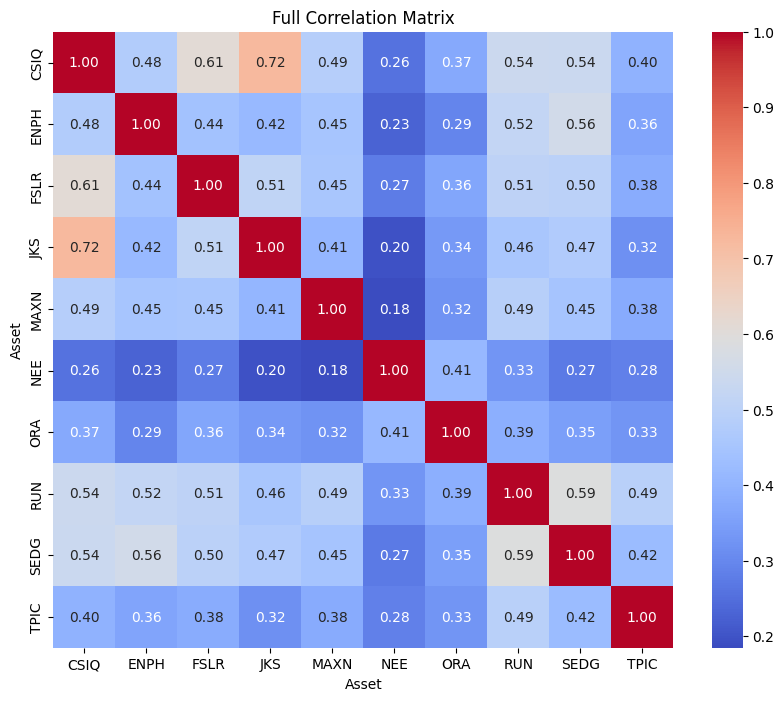

Correlation matrix plot saved as: Full_Correlation_Matrix_correlation_matrix.png


<Figure size 640x480 with 0 Axes>

In [23]:
plot_correlation_matrix(all_corr_matrix, 'Full Correlation Matrix')